# Global High Resolution Daily Extreme Urban Heat Exposure (UHE-Daily), v1 (1983 – 2016) Overview for NASA SEDAC 
A tutorial for UHE-Daily. <br> 
Cascade Tuholske, Dec 8 2021 (cascade@ciesin.columbia.edu) <br>

Download the dataset from NASA SEDAC [here](https://doi.org/10.7927/fq7g-ny13). The dataset was developed for [Tuholske et al. 2021](https://doi.org/10.1073/pnas.2024792118), which measured global urban extreme heat exposure from from 1983 - 2016.  


## Dependencies

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/cpt2136/miniconda3/envs/geo38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Set file paths 
- Here we are going to use the data based on daily wet bulb globe temperature maximum threshold of 30°C
- The file handle is "wbgtmax30"

In [2]:
dataset = 'wbgtmax30'
path = os.path.join('/Users/cpt2136/Github/UrbanHeat/data/SEDAC/tabular/', dataset+'-tabular/')

# Annual exposure data
The EXP suffix shows for each city, for a given year, the number of days per year (**column: tot_days**) where a hot-humid threshold was exceeded multiplied the population (P) to measure exposure (**column: people_days**). This can be expressed as:
> people_days = tot_days X P



In [3]:
# Load annual exposure data
wbgt30_exp_fn = os.path.join(path, dataset+'_EXP.json')
wbgt30_exp = pd.read_json(wbgt30_exp_fn, orient = 'split')
wbgt30_exp.head(4)

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
0,18,2006,2,622283.428656,494664.495616,661553.577433,1.244567e+06,989328.991233,255237.866079,United States,Concord [USA],37.913946,-122.048318,Americas,Northern America,Northern America
1,18,1983,0,NaN,494664.495616,661553.577433,0.000000e+00,0.000000,0.000000,United States,Concord [USA],37.913946,-122.048318,Americas,Northern America,Northern America
2,18,1984,0,NaN,494664.495616,661553.577433,0.000000e+00,0.000000,0.000000,United States,Concord [USA],37.913946,-122.048318,Americas,Northern America,Northern America
3,18,1985,0,NaN,494664.495616,661553.577433,0.000000e+00,0.000000,0.000000,United States,Concord [USA],37.913946,-122.048318,Americas,Northern America,Northern America


## We can do an English language name search based on geography
- **column: CTR_MN_NM** is country
- **column: UC_NM_MN** is an urban settlement's Egnlish language name

In [4]:
# Subset data by urban settlements in India
wbgt30_exp_india = wbgt30_exp[wbgt30_exp['CTR_MN_NM'] == 'India']
wbgt30_exp_india.head()

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
105876,6334,1983,81,24920.674674,24920.674674,50522.148926,2.018575e+06,2.018575e+06,0.000000,India,Uker [IND],23.439135,68.716725,Asia,Southern Asia,Southern Asia
105877,6334,1984,45,25530.395490,24920.674674,50522.148926,1.148868e+06,1.121430e+06,27437.436699,India,Uker [IND],23.439135,68.716725,Asia,Southern Asia,Southern Asia
105878,6334,1985,43,26140.116305,24920.674674,50522.148926,1.124025e+06,1.071589e+06,52435.990136,India,Uker [IND],23.439135,68.716725,Asia,Southern Asia,Southern Asia
105879,6334,1986,45,26749.837121,24920.674674,50522.148926,1.203743e+06,1.121430e+06,82312.310097,India,Uker [IND],23.439135,68.716725,Asia,Southern Asia,Southern Asia
105880,6334,1987,72,27359.557936,24920.674674,50522.148926,1.969888e+06,1.794289e+06,175599.594873,India,Uker [IND],23.439135,68.716725,Asia,Southern Asia,Southern Asia


In [5]:
# Search for Kolkata
wbgt30_exp_kolkata = wbgt30_exp_india[wbgt30_exp_india ['UC_NM_MN'].str.contains("Kolk")]
wbgt30_exp_kolkata.head()

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
211514,9691,1983,85,1.550416e+07,1.550416e+07,2.162029e+07,1.317854e+09,1.317854e+09,0.000000e+00,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
211515,9691,1984,57,1.574532e+07,1.550416e+07,2.162029e+07,8.974831e+08,8.837373e+08,1.374586e+07,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
211516,9691,1985,72,1.598647e+07,1.550416e+07,2.162029e+07,1.151026e+09,1.116300e+09,3.472637e+07,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
211517,9691,1986,77,1.622763e+07,1.550416e+07,2.162029e+07,1.249527e+09,1.193821e+09,5.570689e+07,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
211518,9691,1987,99,1.646878e+07,1.550416e+07,2.162029e+07,1.630410e+09,1.534912e+09,9.549752e+07,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia


## What does exposure look like in Kolkata in 1983?
For example in 1983, for Kolkata (ID_HDC_G0 == 9691), the total days where WBGT > 30°C was 85 and the populations was 15,504,160 people, so the exposure in person-days was 1,317,854,000
<br>
<br>

In [6]:
# Subset Kolkata
kolkata_exp = wbgt30_exp[wbgt30_exp['ID_HDC_G0'] == 9691]
kolkata_exp.head(1)

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
211514,9691,1983,85,1.550416e+07,1.550416e+07,2.162029e+07,1.317854e+09,1.317854e+09,0.0,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia


## How has exposure changed over time?

**Plot person-days exposure from 1983 - 2016**  
To look at how annual exposure for WBGT > 30°C in Kolkata from 1983 - 2016 in Kolkata, you can use the the "year" and "people_days" columns.
<br>
<br>

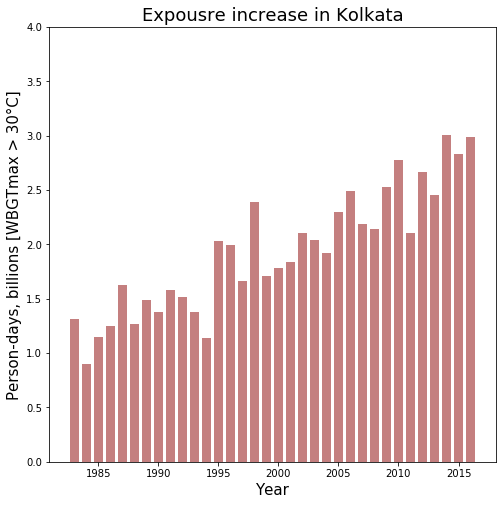

In [7]:
# Set up the figure
fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=False, sharey = False)

# make a bar plot
data = kolkata_exp 
axs.bar(data['year'], data['people_days'] / 10**9, alpha = .5, color = 'darkred')

# add labels, title, and data range
axs.set_ylabel('Person-days, billions [WBGTmax > 30°C]', fontsize = 15)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylim([0, 4])
plt.title('Expousre increase in Kolkata', fontsize = 18);

### What is the contribution to the total change in exposure of population vs total urban warming?
"total urban warming" = warming due to climate change + warming due to the urban heat island effect

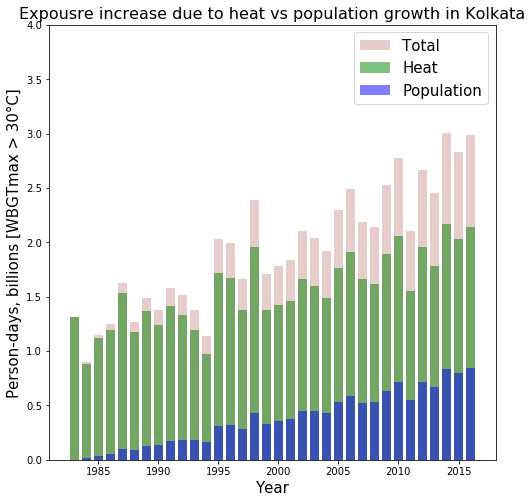

In [9]:
# Set up the figure
fig, axs = plt.subplots(1, 1, figsize = (8, 8))

# make a bar plot
data = kolkata_exp 
axs.bar(data['year'], data['people_days'] / 10**9, alpha = .2, color = 'darkred') # total exposure
axs.bar(data['year'], data['people_days_heat'] / 10**9, alpha = .5, color = 'green') # exposure due to heat increase
axs.bar(data['year'], data['people_days_pop'] / 10**9, alpha = .5, color = 'blue') # exposure due to population increase


# add labels, title, and data range
axs.set_ylabel('Person-days, billions [WBGTmax > 30°C]', fontsize = 15)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylim([0, 4])
plt.title('Expousre increase due to heat vs population growth in Kolkata', fontsize = 16);
plt.legend(['Total','Heat', 'Population'], fontsize = 15)

### How many days per year was wbgtmax > 30°C in Kolkata?

Text(0.5, 1.0, 'Days per-year WBGT>30°C Kolkata')

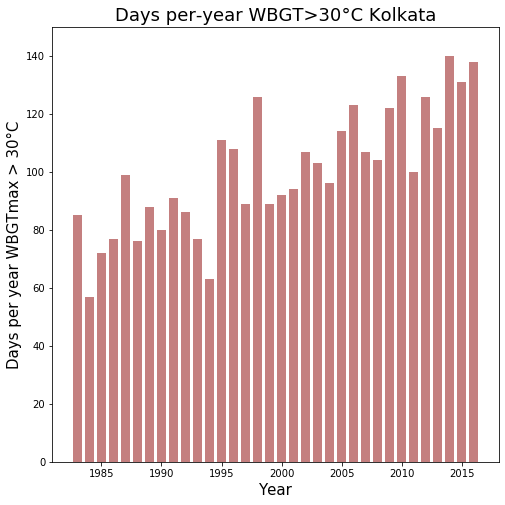

In [10]:
# Set up the figure
fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=False, sharey = False)

# make a bar plot
data = kolkata_exp 
axs.bar(data['year'], data['tot_days'], alpha = .5, color = 'darkred')

# add labels, title, and data range
axs.set_ylabel('Days per year WBGTmax > 30°C', fontsize = 15)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylim([0,150])
plt.title('Days per-year WBGT>30°C Kolkata', fontsize = 18)

# Exposure & Total Urban Warming Trends?
The "_TREND_HEATP05" suffix lists each city with a statistically significant (p < 0.05) increase in the number of days per year a hot-humid heat threshold is exceeded. In other words, this allows you to look at the overall total warming trend from 1983 - 2016.

In [11]:
fn = os.path.join("/Users/cpt2136/Github/UrbanHeat/data/PNAS-Finalv4/wbgtmax30_TREND_HEATP05.json")

In [12]:
# Load heating trend data
dataset = 'wbgtmax30'
wbgt30_heat_fn = os.path.join(path, dataset+'_TREND_HEATP05.json')
wbgt30_heat = pd.read_json(wbgt30_heat_fn, orient = 'split')
wbgt30_heat.head(1)

,ID_HDC_G0,coef_pdays,p_value_pdays,coef_heat,p_value_heat,coef_pop,p_value_pop,coef_totDays,p_value_totDays,coef_attrib,coef_attrib_norm,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region,P1983,P2016
16,61,124447.852339,0.0,6867.884309,0.0169,117579.968031,0.0,0.487701,0.0169,0.889626,0.944768,Mexico,Puerto Penasco [MEX],31.325557,-113.529039,Americas,Latin America and the Caribbean,Central America,14082.175062,66491.710266


### In Kolkata, on average, how many days per year did WBGT > 30°C increase from 1983 - 2016?
The coef_totDays columns shows the annual rate of change in the number of days per year WBGT > 30°C increased from 1983 - 2016. So Kolkata added 1.762108 days per year from 1983 - 2016 where WBGT > 30°C.

In [13]:
# Subset Kolkata
kolkata_heat = wbgt30_heat[wbgt30_heat['ID_HDC_G0'] == 9691]
kolkata_heat.head(1)

,ID_HDC_G0,coef_pdays,p_value_pdays,coef_heat,p_value_heat,coef_pop,p_value_pop,coef_totDays,p_value_totDays,coef_attrib,coef_attrib_norm,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region,P1983,P2016
5434,9691,5.223038e+07,0.0,2.732002e+07,0.0,2.491036e+07,0.0,1.762108,0.0,-0.046135,0.476507,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia,1.550416e+07,2.162029e+07


In [14]:
ans = np.round(kolkata_heat['coef_totDays'].values[0],1)
print("How quickly is Kolkata warming?", ans, 'days per year')

How quickly is Kolkata warming? 1.8 days per year


### Plot the trend of increasing heat for Kolkata

Text(1982, 136, 'Kolkata warmed by 1.8 days\nper year WBGT > 30°C')

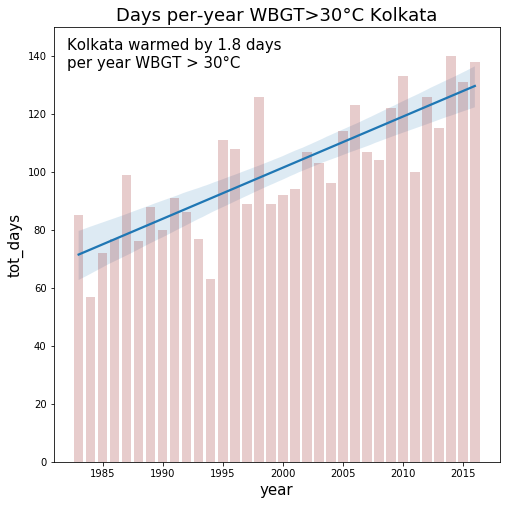

In [15]:
# Set up the figure
fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=False, sharey = False)

# make a bar plot
data = kolkata_exp 
axs.bar(data['year'], data['tot_days'], alpha = .2, color = 'darkred')

# add labels, title, and data range
axs.set_ylabel('Days per year WBGTmax > 30°C', fontsize = 15)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylim([0,150])
plt.title('Days per-year WBGT>30°C Kolkata', fontsize = 18);

# plot the trendline
sns.regplot(x = data['year'], y =data['tot_days'], scatter=False)

# add text
text = 'Kolkata warmed by ' + str(ans)+' days\nper year WBGT > 30°C'
plt.text(1982, 136, text, size=15)

## What do individual heatwaves look like for Kolkata?
The "_STATS" suffix contains the duration, dates, intensities, tempatures, and averages for every heat wave to hit an urban settlement from 1983 - 2016


In [16]:
# Load heat wave stats data
dataset = 'wbgtmax30'
wbgt30_stats_fn = os.path.join(path, dataset+'_STATS.json')
wbgt30_stats = pd.read_json(wbgt30_stats_fn, orient = 'split')
wbgt30_stats.head(1)

,ID_HDC_G0,year,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,UID,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
0,10796,1983,2,30.449124,0.449124,0.898249,"[1983.07.22, 1983.07.23]","[0.283854, 0.614395]","[30.283854, 30.614395000000002]",UID-0,China,Gu'An [CHN],39.43408,116.312194,Asia,Eastern Asia,Eastern Asia


In [17]:
# Subset Kolkata
kolkata_stats = wbgt30_stats[wbgt30_stats['ID_HDC_G0'] == 9691]
kolkata_stats.head()

,ID_HDC_G0,year,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,UID,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
1578216,9691,1983,2,30.220539,0.220539,0.441078,"[1983.03.28, 1983.03.29]","[0.367855, 0.073223]","[30.367855, 30.073223]",UID-1578216,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
1578217,9691,1983,2,30.442115,0.442115,0.884230,"[1983.04.02, 1983.04.03]","[0.5448900000000001, 0.33934000000000003]","[30.54489, 30.33934]",UID-1578217,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
1578218,9691,1983,1,30.308002,0.308002,0.308002,[1983.04.09],[0.308002],[30.308002],UID-1578218,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
1578219,9691,1983,5,30.458100,0.458100,2.290502,"[1983.04.23, 1983.04.24, 1983.04.25, 1983.04.2...","[0.15284499999999998, 0.665165, 0.49724, 0.216...","[30.152845, 30.665165000000002, 30.49724, 30.2...",UID-1578219,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia
1578220,9691,1983,3,31.168060,1.168060,3.504179,"[1983.04.29, 1983.04.30, 1983.05.01]","[1.200548, 1.755163, 0.548468]","[31.200548, 31.755163, 30.548468]",UID-1578220,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia


## Let's look at heat waves where WBGT > 30° lasted at least 30 days in Kolkata

In [18]:
kolkata_30days = kolkata_stats[kolkata_stats['duration'] > 30]

In [19]:
print('From 1983 - 2016, how many heatwaves lasted more than 30 days?', len(kolkata_30days))

From 1983 - 2016, how many heatwaves lasted more than 30 days? 10


In [20]:
print("What years did these happen?", kolkata_30days['year'].values)

What years did these happen? [1989 1996 1999 2003 2005 2008 2010 2012 2015 2016]


In [21]:
ans = kolkata_30days[(kolkata_30days['year'] == 2016) & (kolkata_30days['duration'] > 30)]['UID'].values[0]
print('What is the event ID of 2016 30+ day event?', ans)

What is the event ID of 2016 30+ day event? UID-1578971


In [23]:
kolkata_30days[(kolkata_30days['year'] == 2016) & (kolkata_30days['duration'] > 30)]

,ID_HDC_G0,year,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,UID,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
1578971,9691,2016,31,31.925295,1.925295,59.684143,"[2016.04.03, 2016.04.04, 2016.04.05, 2016.04.0...","[0.797443, 1.8152789999999999, 0.758385, 0.485...","[30.797443, 31.815279, 30.758385, 30.48561, 31...",UID-1578971,India,Kolkata (Calcutta) [IND],22.524884,88.292496,Asia,Southern Asia,Southern Asia


In [24]:
ans = kolkata_30days[kolkata_30days['UID'] == 'UID-1578971']['event_dates']
print("On what dates did the >30-day heat occure in 2016 in Kolkata?")
for event in list(ans.values[0]):
    print(event)

On what dates did the >30-day heat occure in 2016 in Kolkata?
2016.04.03
2016.04.04
2016.04.05
2016.04.06
2016.04.07
2016.04.08
2016.04.09
2016.04.10
2016.04.11
2016.04.12
2016.04.13
2016.04.14
2016.04.15
2016.04.16
2016.04.17
2016.04.18
2016.04.19
2016.04.20
2016.04.21
2016.04.22
2016.04.23
2016.04.24
2016.04.25
2016.04.26
2016.04.27
2016.04.28
2016.04.29
2016.04.30
2016.05.01
2016.05.02
2016.05.03


## Let's make a data frame of the 2016 30+ day event in Kolkata

In [25]:
# make a dataframe and get the dates
df = pd.DataFrame()
df['dates'] = ans.to_list()[0]

# get the WBGT values
df['WBGTmax'] = kolkata_30days[kolkata_30days['UID'] == 'UID-1578971']['tmax'].values[0]

In [26]:
df

,dates,WBGTmax
0,2016.04.03,30.797443
1,2016.04.04,31.815279
2,2016.04.05,30.758385
3,2016.04.06,30.485610
4,2016.04.07,31.501516
5,2016.04.08,31.843285
6,2016.04.09,32.012665
7,2016.04.10,31.909977
8,2016.04.11,31.934590
9,2016.04.12,31.437635


# What are the top 50 cities in terms of increasing exposure trend?
The "_TREND_PDAYSP05" suffix lists each city with a statistically significant (p < 0.05) increase in the annual rate of exposure (person-days per year) using a given hot-humid heat threshold is exceeded. In other words, this allows you to look at the overall exposure trend from 1983 - 2016. This is the primary dataset used in Tuholske et al 2021 referenced at the beginning. 

In [27]:
# Load exposure trend data
dataset = 'wbgtmax30'
wbgt30_pdays_fn = os.path.join(path, dataset+'_TREND_PDAYS05.json')
wbgt30_pdays = pd.read_json(wbgt30_pdays_fn, orient = 'split')
wbgt30_pdays.head(1)

,ID_HDC_G0,coef_pdays,p_value_pdays,coef_heat,p_value_heat,coef_pop,p_value_pop,coef_totDays,p_value_totDays,coef_attrib,coef_attrib_norm,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region,P1983,P2016
12,52,101604.735492,0.0007,28022.279616,0.0764,73582.455875,0.0,0.280825,0.0764,0.448406,0.723979,Mexico,La Paz [MEX],24.117658,-110.310119,Americas,Latin America and the Caribbean,Central America,99785.538677,249632.317993


In [28]:
# Subset top 50 
top50 = wbgt30_pdays.sort_values('coef_pdays', ascending = False).head(50)


In [29]:
# rename columns
out = top50 [['ID_HDC_G0','coef_pdays', 'coef_totDays', 'UC_NM_MN', 'CTR_MN_NM', 'GCPNT_LAT','GCPNT_LON','P1983', 'P2016']]
out.rename(columns={"coef_pdays": "Exposure Trend (person-days per year)", 
                    "coef_totDays": "Days WBGT30 per year increase", "UC_NM_MN" : "City", "CTR_MN_NM" : 
                    "Country", "GCPNT_LAT" : "Latitude", "GCPNT_LON" : "Longitude", "P1983" : "Pop. 1983", "P2016" : "Pop 2016"}, inplace = True)

/Users/cpt2136/miniconda3/envs/geo38/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
# What are the top 10 cities in terms of increase in person-days per year?
out.head(10)

,ID_HDC_G0,Exposure Trend (person-days per year),Days WBGT30 per year increase,City,Country,Latitude,Longitude,Pop. 1983,Pop 2016
5612,9872,5.750162e+07,1.472116,Dhaka [BGD],Bangladesh,23.807052,90.401663,7.752316e+06,2.394235e+07
3058,6955,5.539828e+07,1.123759,Delhi [IND],India,28.628774,77.203262,1.275304e+07,2.665871e+07
5434,9691,5.223038e+07,1.762108,Kolkata (Calcutta) [IND],India,22.524884,88.292496,1.550416e+07,2.162029e+07
6047,10715,3.650017e+07,1.437892,Krung Thep (Bangkok) [THA],Thailand,13.766890,100.543710,4.585028e+06,1.473084e+07
2958,6845,2.932976e+07,0.935982,Mumbai (Bombay) [IND],India,19.141073,72.970721,1.432311e+07,2.175588e+07
2413,6169,2.657711e+07,1.043697,Karachi [PAK],Pakistan,24.899308,67.078010,6.397889e+06,1.315069e+07
4486,8675,2.612883e+07,1.210542,Chennai (Madras) [IND],India,13.016358,80.173301,5.600171e+06,9.992602e+06
2357,5915,2.245258e+07,0.831474,Dubayy (Dubai) [ARE],United Arab Emirates,25.221261,55.330177,5.128607e+05,4.909471e+06
2642,6473,2.023177e+07,0.392972,Lahore [PAK],Pakistan,31.517865,74.252650,4.617571e+06,1.011472e+07
7292,12829,1.832689e+07,0.671963,Manila [PHL],Philippines,14.551914,121.019178,8.995415e+06,2.169114e+07


In [ ]:
# Save 
#out.to_csv("/Users/cpt2136/Desktop/UrbanExtremeHeat-Top50.csv", index = False)